<a href="https://colab.research.google.com/github/AbbySnt/EstadisticaAplicada_1990002/blob/main/sesion8_g44_7sep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Estadictica aplicada

sesion 8 - 7 sep

Yessica Abigail Santiago Hernandez 1990002

Gpo 44

In [11]:
#librerias de cajon
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#librerias especializadas
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test

In [19]:
#datos
ejer_km = pd.read_excel('/content/drive/MyDrive/EA_YASH_1990002/ejercicio_KM.xlsx')


In [20]:
ejer_km.head()

,indv,tiempo_sub,evento
0,1,6,1
1,2,6,1
2,3,6,1
3,4,7,1
4,5,10,1


In [21]:
#modelo kaplan-meier
km1 = KaplanMeierFitter().fit(ejer_km['tiempo_sub'],ejer_km['evento'])

In [22]:
km1.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,21,21
6.0,4,3,1,0,21
7.0,1,1,0,0,17
9.0,1,0,1,0,16
10.0,2,1,1,0,15
11.0,1,0,1,0,13
13.0,1,1,0,0,12
16.0,1,1,0,0,11
17.0,1,0,1,0,10


In [23]:
km1.survival_function_

,KM_estimate
timeline,
0.0,1.000000
6.0,0.857143
7.0,0.806723
9.0,0.806723
10.0,0.752941
11.0,0.752941
13.0,0.690196
16.0,0.627451
17.0,0.627451


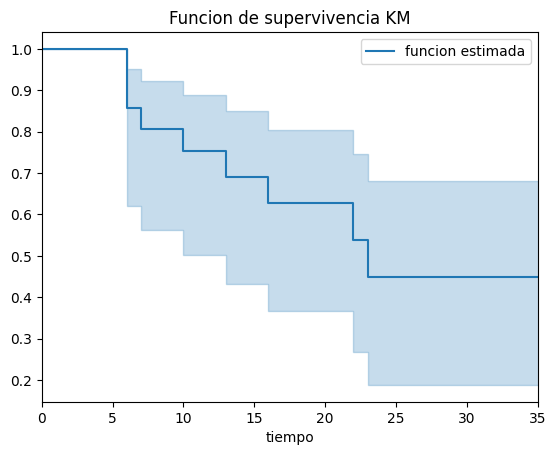

In [27]:
#grafica
km1.plot_survival_function(label = 'funcion estimada')
plt.title('Funcion de supervivencia KM')
plt.xlabel('tiempo')
plt.xlim(0,35);
#el area sombreada es el intervalo de confianza al 95%

Revisar una nueva base de datos

In [28]:
relacion = pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/km_relacion.csv')

In [29]:
relacion.head()

,tratamiento,t,estado
0,0,1,1
1,0,1,1
2,0,2,1
3,0,2,1
4,0,3,1


In [31]:
relacion.count()

tratamiento    42
t              42
estado         42
dtype: int64

 La base contiene la informacion de 42 individuos que se encuentran en una relacion, "t" es el tiempo de supervivencia de la relacion en semanas, el evento "relacion terminada", esta en la columna estado 1 relacion termino, 0 censurada.

 La variable tratamiento contiene 0 y 1, 0 es si la persona era no detallista en la relacion y 1 es si la persona era detallista. Detallista es que hiciera un regalo a la semana a su pareja (flor, paleta, oso, etc)

In [32]:
km_all = KaplanMeierFitter().fit(relacion['t'],relacion['estado'])

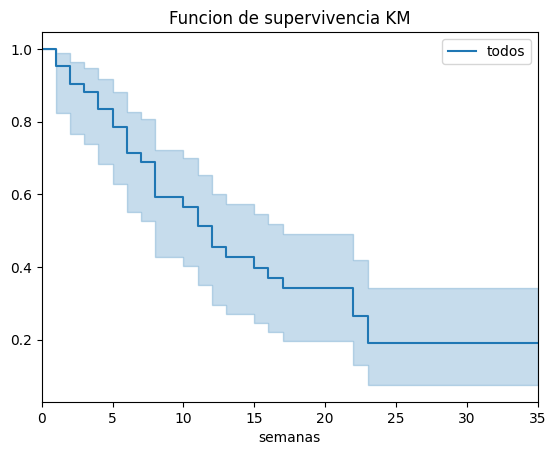

In [34]:
km_all.plot_survival_function(label = 'todos')
plt.title('Funcion de supervivencia KM')
plt.xlabel('semanas')
plt.xlim(0,35);

In [35]:
#dividir los datos
detallistas = relacion.query('tratamiento == 1')
no_deta = relacion.query('tratamiento == 0')


In [38]:
#estimar funciones de supervivencia para detallistas y no detallistas
km_deta = KaplanMeierFitter().fit(detallistas['t'],detallistas['estado'])
km_nodeta = KaplanMeierFitter().fit(no_deta['t'],no_deta['estado'])

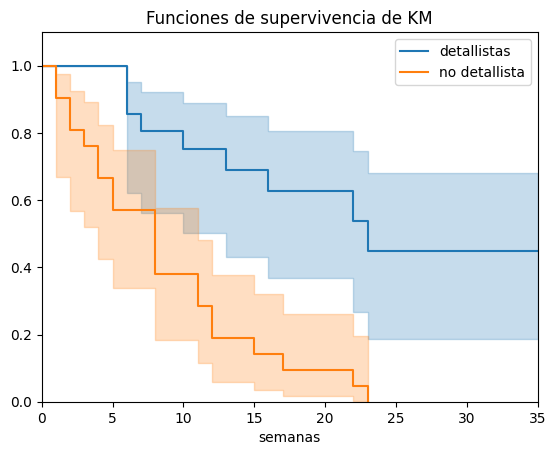

In [41]:
#graficar
km_deta.plot_survival_function(label = 'detallistas')
km_nodeta.plot_survival_function(label = 'no detallista')
plt.title('Funciones de supervivencia de KM')
plt.xlim(0,35)
plt.ylim(0,1.1)
plt.xlabel('semanas');

Para verificar que las funciones de supervivecia son distintas realizaremos una prueba de hipotesis (log rank test)

log rank test

$Ho: S(gpo1)=S(gpo2)$ funciones de supervivencia identicas

$Ha: S(gpo1) \neq S(gpo2)$  funciones de supervivencia distintas

In [43]:
#logrank_test(tiempog1,tiempog2,eventog1,eventog2)
##gpo1= detallistas , gpo2= no detallistas
LRT = logrank_test(detallistas['t'],no_deta['t'],detallistas['estado'],no_deta['estado'])
LRT.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
          16.79 <0.005     14.55

In [47]:
print(LRT.p_value.round(4))

0.0


In [51]:
#si el p valor es mayor al alfa rechazamos Ho
print('como pvalue= ',LRT.p_value.round(3),'<',0.05,'Rechazamos Ho, \nsignifica que las fuciones de supervivencia son distintas,\npor lo tanto los no detallistas terminan su relacion mas rapido que los detallistas')

como pvalue=  0.0 < 0.05 Rechazamos Ho, 
significa que las fuciones de supervivencia son distintas,
por lo tanto los no detallistas terminan su relacion mas rapido que los detallistas
